<a href="https://colab.research.google.com/github/faisalisafk/Robi_Datathon_2.0/blob/main/Datathon_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Important Libraries

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,f_classif
from sklearn.model_selection import cross_val_score,StratifiedKFold
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

# Load Dataset

In [3]:
train_data=pd.read_csv('https://raw.githubusercontent.com/faisalisafk/Robi_Datathon_2.0/main/train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/faisalisafk/Robi_Datathon_2.0/main/test.csv')
submission=pd.read_csv('https://raw.githubusercontent.com/faisalisafk/Robi_Datathon_2.0/main/sample_submission.csv')
train_data.head() 

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,NaN,kK,NaN,NaN,B,NaN,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


# Statisical Analysis & EDA

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85065 entries, 0 to 85064
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      85065 non-null  object 
 1   gender  85065 non-null  object 
 2   s11     85065 non-null  object 
 3   s12     85065 non-null  object 
 4   s13     85065 non-null  int64  
 5   s16     85065 non-null  object 
 6   s17     85065 non-null  object 
 7   s18     85065 non-null  object 
 8   s48     85065 non-null  int64  
 9   s52     85065 non-null  object 
 10  s53     85065 non-null  object 
 11  s54     7743 non-null   object 
 12  s55     9421 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     85065 non-null  object 
 16  s59     0 non-null      float64
 17  s69     85065 non-null  object 
 18  s70     85065 non-null  object 
 19  s71     85065 non-null  object 
 20  n1      85065 non-null  float64
 21  n2      85065 non-null  float64
 22

In [6]:
train_data.describe()

,s13,s48,s56,s57,s59,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
count,28322.000000,28322.000000,0.0,0.0,0.0,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,0.983123,0.433338,NaN,NaN,NaN,10.201863,1.600111,4.805099,5.080537,-32.641183,0.015014,-9.107429,1.612428,5.232644,6.115109,1.699553,0.009992,0.089506,0.497570,2.997740,0.168067
std,0.128814,0.495545,NaN,NaN,NaN,4.414660,0.664985,2.199282,2.276162,0.241453,0.006550,0.205200,0.173560,2.179705,2.474138,0.115150,0.099462,0.285478,0.289207,2.007611,0.373933
min,0.000000,0.000000,NaN,NaN,NaN,2.200736,0.311727,0.000000,1.700370,-33.167589,0.000584,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000000,0.000101,0.000000,0.000000
25%,1.000000,0.000000,NaN,NaN,NaN,6.592127,1.013540,3.000000,2.833161,-32.862207,0.009195,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.000000,0.247801,1.000000,0.000000
50%,1.000000,0.000000,NaN,NaN,NaN,9.535961,1.462197,5.000000,4.840320,-32.577026,0.016053,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.000000,0.495255,3.000000,0.000000
75%,1.000000,1.000000,NaN,NaN,NaN,14.432580,2.194510,6.000000,7.300738,-32.396733,0.018771,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.000000,0.748786,5.000000,0.000000
max,1.000000,1.000000,NaN,NaN,NaN,20.882733,3.137331,9.000000,8.594620,-32.289180,0.029992,-8.586583,2.173593,11.214870,12.029135,1.899995,1.000000,1.000000,0.999990,6.000000,1.000000


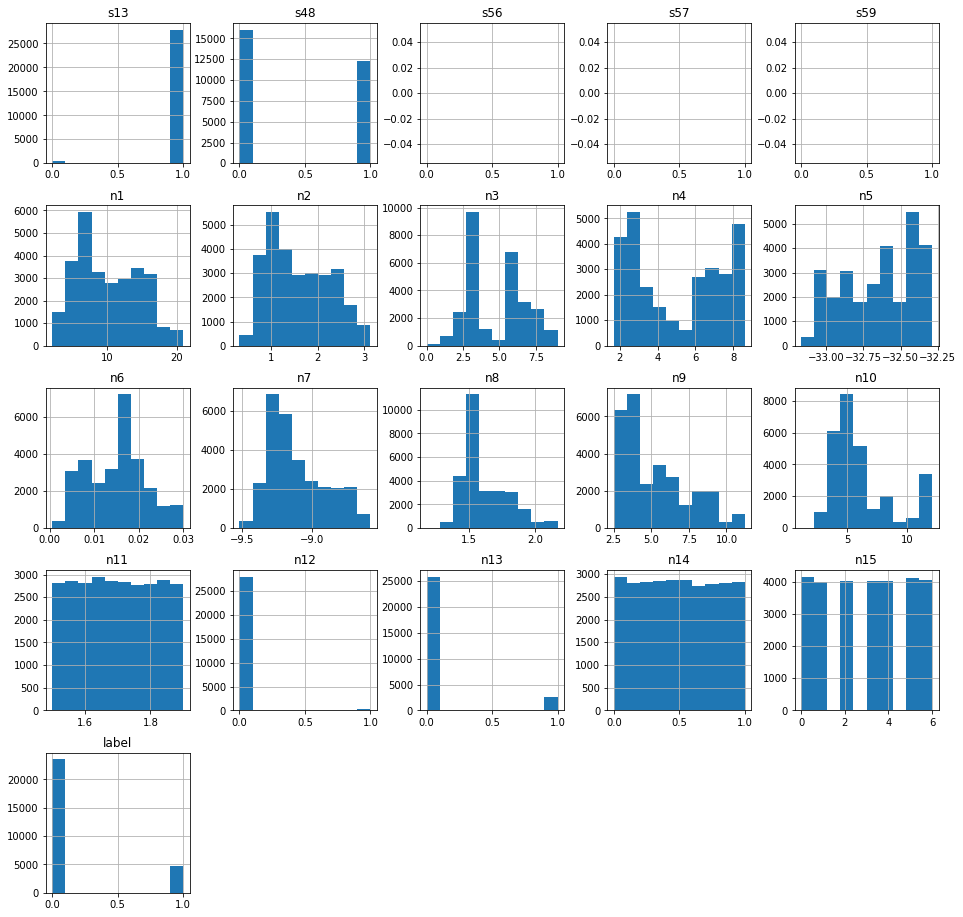

In [7]:
train_data.hist(figsize=(16,16))
plt.show()

# Preprocessing and feature selection

In [8]:
# get the number of missing data points per column
missing_values_count = train_data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [9]:
# how many total missing values do we have?
total_cells = np.product(train_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

13.316699228711093

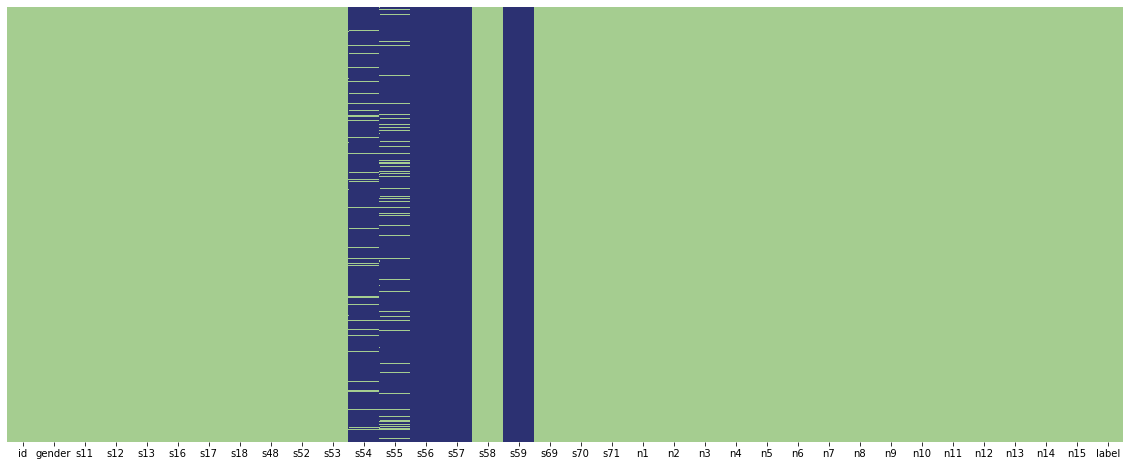

In [10]:
# missing value visualization by heatmap
plt.figure(figsize=(20,8))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='crest')

Text(0.0, 1.0, 'Missing value percentage')

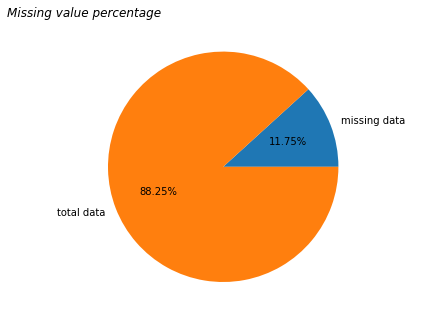

In [11]:
# assigning x and y coordinates
Preference = ['missing data', 'total data']
  
values = [total_missing,total_cells]
  
# depicting the visualization
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(values, labels = Preference, 
       autopct='%1.2f%%')
  
# displaying the title
plt.title(label="Missing value percentage",
          loc="left",
          fontstyle='italic')

In [12]:
#categorical col
cat_cols = train_data.select_dtypes(include= "object").columns
cat_cols

Index(['id', 'gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's54', 's55', 's58', 's69',
       's70', 's71'],
      dtype='object')

In [13]:
# Convert object to category
cat_cols=cat_cols[1:]
train_data[cat_cols] = train_data[cat_cols].apply(lambda x:x.astype("category"))
test_data[cat_cols] = test_data[cat_cols].apply(lambda x:x.astype("category"))

In [14]:
# encoding
train_data[cat_cols]=train_data[cat_cols].apply(lambda x: x.cat.codes)
test_data[cat_cols]=test_data[cat_cols].apply(lambda x: x.cat.codes)

In [15]:
train_data.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,1,0,1,3,3,1,0,1,1,-1,7,NaN,NaN,1,NaN,2,3,1,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,1,1,3,3,1,1,1,1,-1,-1,NaN,NaN,1,NaN,2,3,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,1,1,1,3,3,1,0,1,1,-1,-1,NaN,NaN,1,NaN,2,3,1,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0,1,1,1,3,3,1,0,1,1,-1,-1,NaN,NaN,1,NaN,2,3,1,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,0,1,1,1,3,3,1,2,1,-1,-1,NaN,NaN,1,NaN,3,3,3,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [16]:
y=train_data.label
test_id=test_data.id
#drop irrevalent and less important columns on both dataset
train_data.drop(['id','s54','s55','s56','s57','s59','label'],axis=1,inplace=True)
test_data.drop(['id','s54','s55','s56','s57','s59'],axis=1,inplace=True)

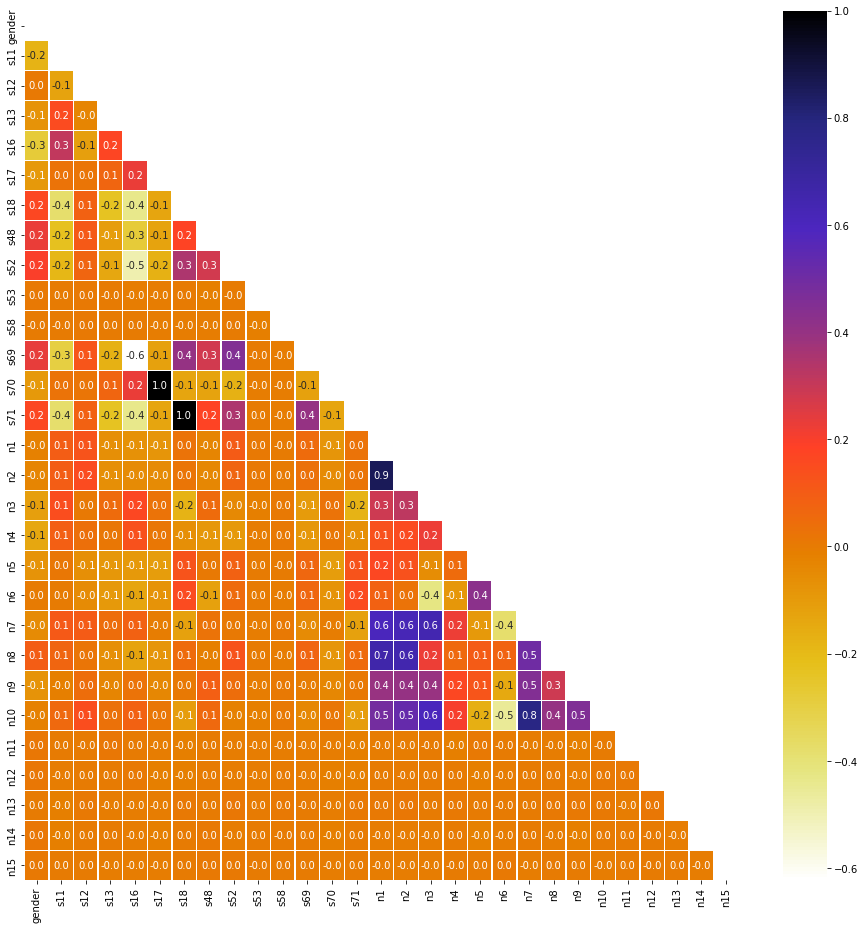

In [17]:
# cor-relations plot 
corr = train_data.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (16,16))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap=plt.cm.CMRmap_r, mask=mask1)

In [18]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(train_data, 0.7)
len(set(corr_features))

4

In [20]:
train_data=train_data.drop(corr_features,axis=1)
test_data=test_data.drop(corr_features,axis=1)

In [21]:
# P-value
def chi2_calc(df,target):
    scores=[]
    for col in df.columns:
        ct=pd.crosstab(df[col],target)
        stat,p,dof,expected=chi2_contingency(ct)
        scores.append(p)
    return pd.DataFrame(scores, index=df.columns, columns=['P value']).sort_values(by='P value')

In [22]:
chi2_calc(train_data,y)

,P value
s11,0.000000e+00
s16,0.000000e+00
s17,0.000000e+00
s18,0.000000e+00
s48,0.000000e+00
s52,0.000000e+00
s69,0.000000e+00
gender,4.848059e-309
s13,4.099683e-271
n3,1.299466e-125


# Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split( train_data, y, test_size=0.33, random_state=42)

# Model Experiment

In [24]:
model_list=[]
score=[]

AUC score: 79.57998127909329
              precision    recall  f1-score   support

           0      0.884     0.967     0.924      7808
           1      0.684     0.357     0.469      1539

    accuracy                          0.867      9347
   macro avg      0.784     0.662     0.697      9347
weighted avg      0.851     0.867     0.849      9347



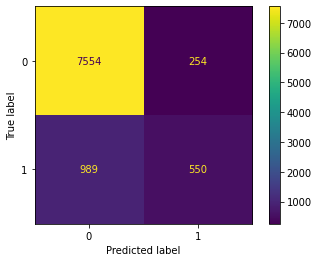

In [25]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(kn_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('K Neighbors Classifier')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, kn_clf.predict(X_test), digits = 3))


cm = confusion_matrix(y_test, kn_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

AUC score: 86.28508006316639
              precision    recall  f1-score   support

           0      0.901     0.965     0.932      7808
           1      0.723     0.463     0.564      1539

    accuracy                          0.882      9347
   macro avg      0.812     0.714     0.748      9347
weighted avg      0.872     0.882     0.871      9347



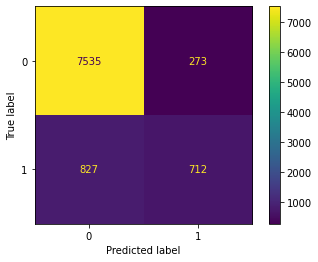

In [26]:
# RF
clf_rf = RandomForestClassifier()      
clf_rf.fit(X_train,y_train)
y_pred=pd.DataFrame(clf_rf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('Random Forest Classifier')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, clf_rf.predict(X_test), digits = 3))


cm = confusion_matrix(y_test, clf_rf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


AUC score: 86.0612547135142
              precision    recall  f1-score   support

           0      0.903     0.959     0.930      7808
           1      0.696     0.476     0.565      1539

    accuracy                          0.879      9347
   macro avg      0.799     0.717     0.748      9347
weighted avg      0.869     0.879     0.870      9347



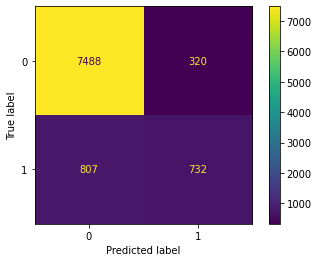

In [27]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=pd.DataFrame(log_reg.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('logistic regression')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, log_reg.predict(X_test), digits = 3))

cm = confusion_matrix(y_test,  log_reg.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

In [28]:
####### takes too much time, about 4 minutes :()
# # svc

# clf_svm = SVC(gamma='auto',probability=True,class_weight='balanced')
# clf_svm.fit(X_train,y_train)
# y_pred = pd.DataFrame(clf_svm.predict_proba(X_test))[1].values
# score.append(roc_auc_score(y_test,y_pred))
# model_list.append('SVM')
# print("AUC score:",roc_auc_score(y_test,y_pred)*100)
# print(metrics.classification_report(y_test, clf_svm.predict(X_test), digits = 3))

# cm = confusion_matrix(y_test,  clf_svm.predict(X_test))
# cmd = ConfusionMatrixDisplay(cm)
# cmd.plot();

AUC score: 84.01960985017949
              precision    recall  f1-score   support

           0      0.908     0.946     0.927      7808
           1      0.652     0.511     0.573      1539

    accuracy                          0.875      9347
   macro avg      0.780     0.729     0.750      9347
weighted avg      0.865     0.875     0.868      9347



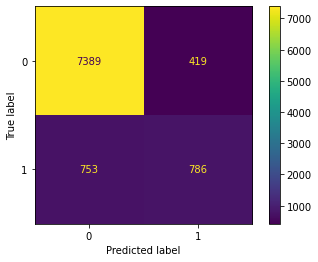

In [29]:
#DT
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='entropy')
dt_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(dt_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('Decission Tree')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, dt_clf.predict(X_test), digits = 3))

cm = confusion_matrix(y_test, dt_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

AUC score: 87.19862302804674
              precision    recall  f1-score   support

           0      0.905     0.964     0.934      7808
           1      0.726     0.487     0.583      1539

    accuracy                          0.885      9347
   macro avg      0.816     0.725     0.758      9347
weighted avg      0.876     0.885     0.876      9347



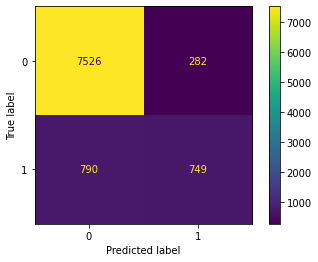

In [30]:
#  lightgbm 
import lightgbm
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(lgb_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('lightgbm')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, lgb_clf.predict(X_test), digits = 3))

cm = confusion_matrix(y_test, lgb_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

AUC score: 85.40541964257183
              precision    recall  f1-score   support

           0      0.936     0.848     0.890      7808
           1      0.478     0.707     0.571      1539

    accuracy                          0.825      9347
   macro avg      0.707     0.777     0.730      9347
weighted avg      0.861     0.825     0.837      9347



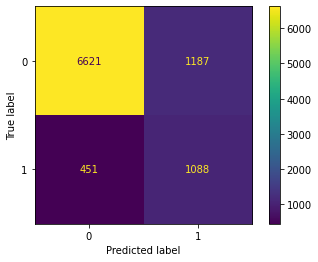

In [31]:
# quick experiment on oversampling

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE

bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train_oversampled, y_train_oversampled = bsmote.fit_resample(X_train, y_train)

from imblearn.combine import SMOTETomek,SMOTEENN
bsmote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = bsmote.fit_resample(X_train, y_train)


import lightgbm
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(X_train_oversampled,y_train_oversampled)
y_pred=pd.DataFrame(lgb_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('lightgbm')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, lgb_clf.predict(X_test), digits = 3))

cm = confusion_matrix(y_test, lgb_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

Learning rate set to 0.299032
0:	learn: 0.5674993	total: 114ms	remaining: 11.3s
1:	learn: 0.4925776	total: 168ms	remaining: 8.24s
2:	learn: 0.4611535	total: 230ms	remaining: 7.45s
3:	learn: 0.4441275	total: 291ms	remaining: 6.99s
4:	learn: 0.4263857	total: 345ms	remaining: 6.56s
5:	learn: 0.4141764	total: 394ms	remaining: 6.17s
6:	learn: 0.4015658	total: 447ms	remaining: 5.93s
7:	learn: 0.3927601	total: 496ms	remaining: 5.71s
8:	learn: 0.3863184	total: 549ms	remaining: 5.55s
9:	learn: 0.3801040	total: 604ms	remaining: 5.44s
10:	learn: 0.3726166	total: 657ms	remaining: 5.31s
11:	learn: 0.3677286	total: 705ms	remaining: 5.17s
12:	learn: 0.3598299	total: 753ms	remaining: 5.04s
13:	learn: 0.3570978	total: 802ms	remaining: 4.93s
14:	learn: 0.3471119	total: 854ms	remaining: 4.84s
15:	learn: 0.3469573	total: 866ms	remaining: 4.55s
16:	learn: 0.3429875	total: 916ms	remaining: 4.47s
17:	learn: 0.3343549	total: 966ms	remaining: 4.4s
18:	learn: 0.3250208	total: 1.02s	remaining: 4.34s
19:	learn: 0

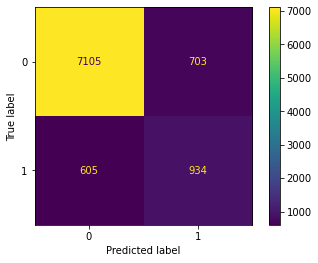

In [32]:
#catboost

from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=100,depth=10,random_state=42,auto_class_weights='Balanced')
cat_model.fit(X_train,y_train)
y_pred=pd.DataFrame(cat_model.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('catboost')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, cat_model.predict(X_test), digits = 3))

cm = confusion_matrix(y_test, cat_model.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

AUC score: 85.40968460731366
              precision    recall  f1-score   support

           0      0.907     0.946     0.927      7808
           1      0.653     0.510     0.573      1539

    accuracy                          0.875      9347
   macro avg      0.780     0.728     0.750      9347
weighted avg      0.865     0.875     0.868      9347



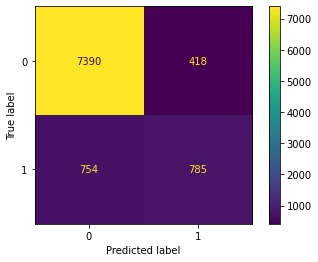

In [33]:
# xgbrf classifier
import xgboost
xgb_clf = xgboost.XGBRFClassifier(max_depth=4, random_state=1,n_estimators=500)
xgb_clf.fit(X_train,y_train)
y_pred=pd.DataFrame(xgb_clf.predict_proba(X_test))[1].values
score.append(roc_auc_score(y_test,y_pred))
model_list.append('xgbrf classifier')
print("AUC score:",roc_auc_score(y_test,y_pred)*100)
print(metrics.classification_report(y_test, xgb_clf.predict(X_test), digits = 3))

cm = confusion_matrix(y_test, xgb_clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

# Comparison of models

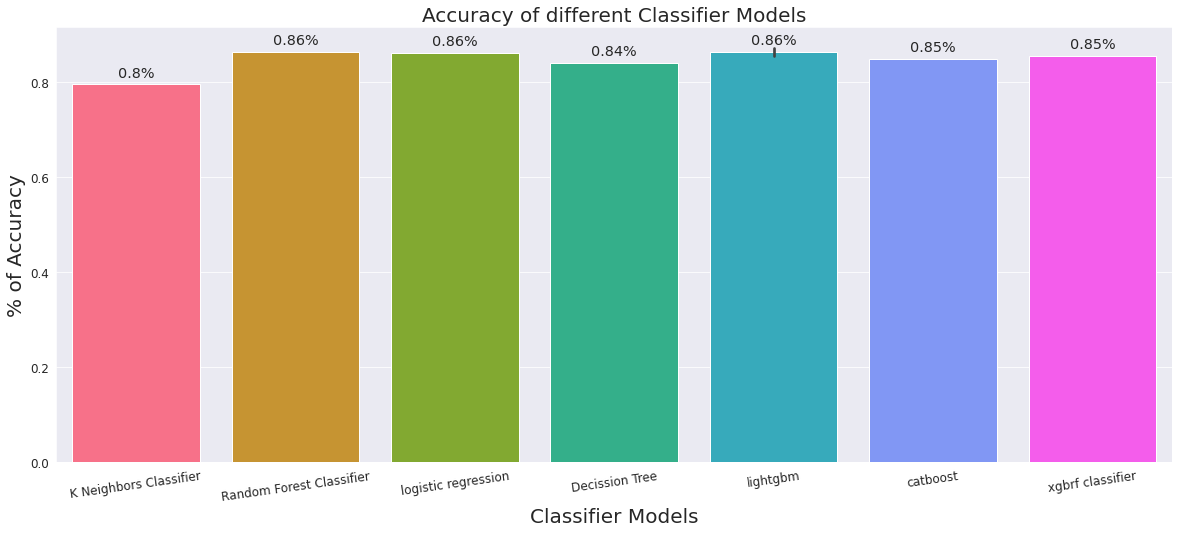

In [34]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=score, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()